In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
Book = pd.read_csv("C:/Users/lenovo/Downloads/book (1).csv")
Book.head(20)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,0


In [4]:
Book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
te=TransactionEncoder()

In [6]:
te_ary=te.fit(Book).transform(Book)
te_ary

array([[False,  True,  True, ...,  True, False, False],
       [False,  True, False, ...,  True,  True,  True],
       [False,  True,  True, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

C:\Excel R\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ChildBks', ylabel='Density'>

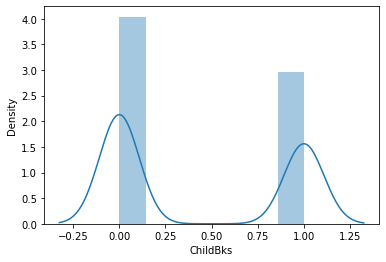

In [7]:
# Visualization
sns.distplot(Book['ChildBks'])

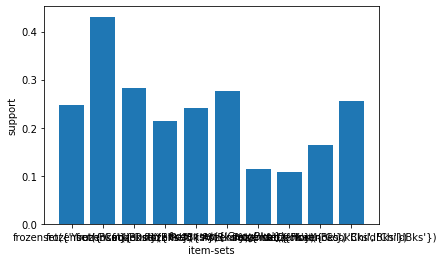

In [8]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(Book,min_support=0.05,use_colnames=True,max_len=3)
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11]);
plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)

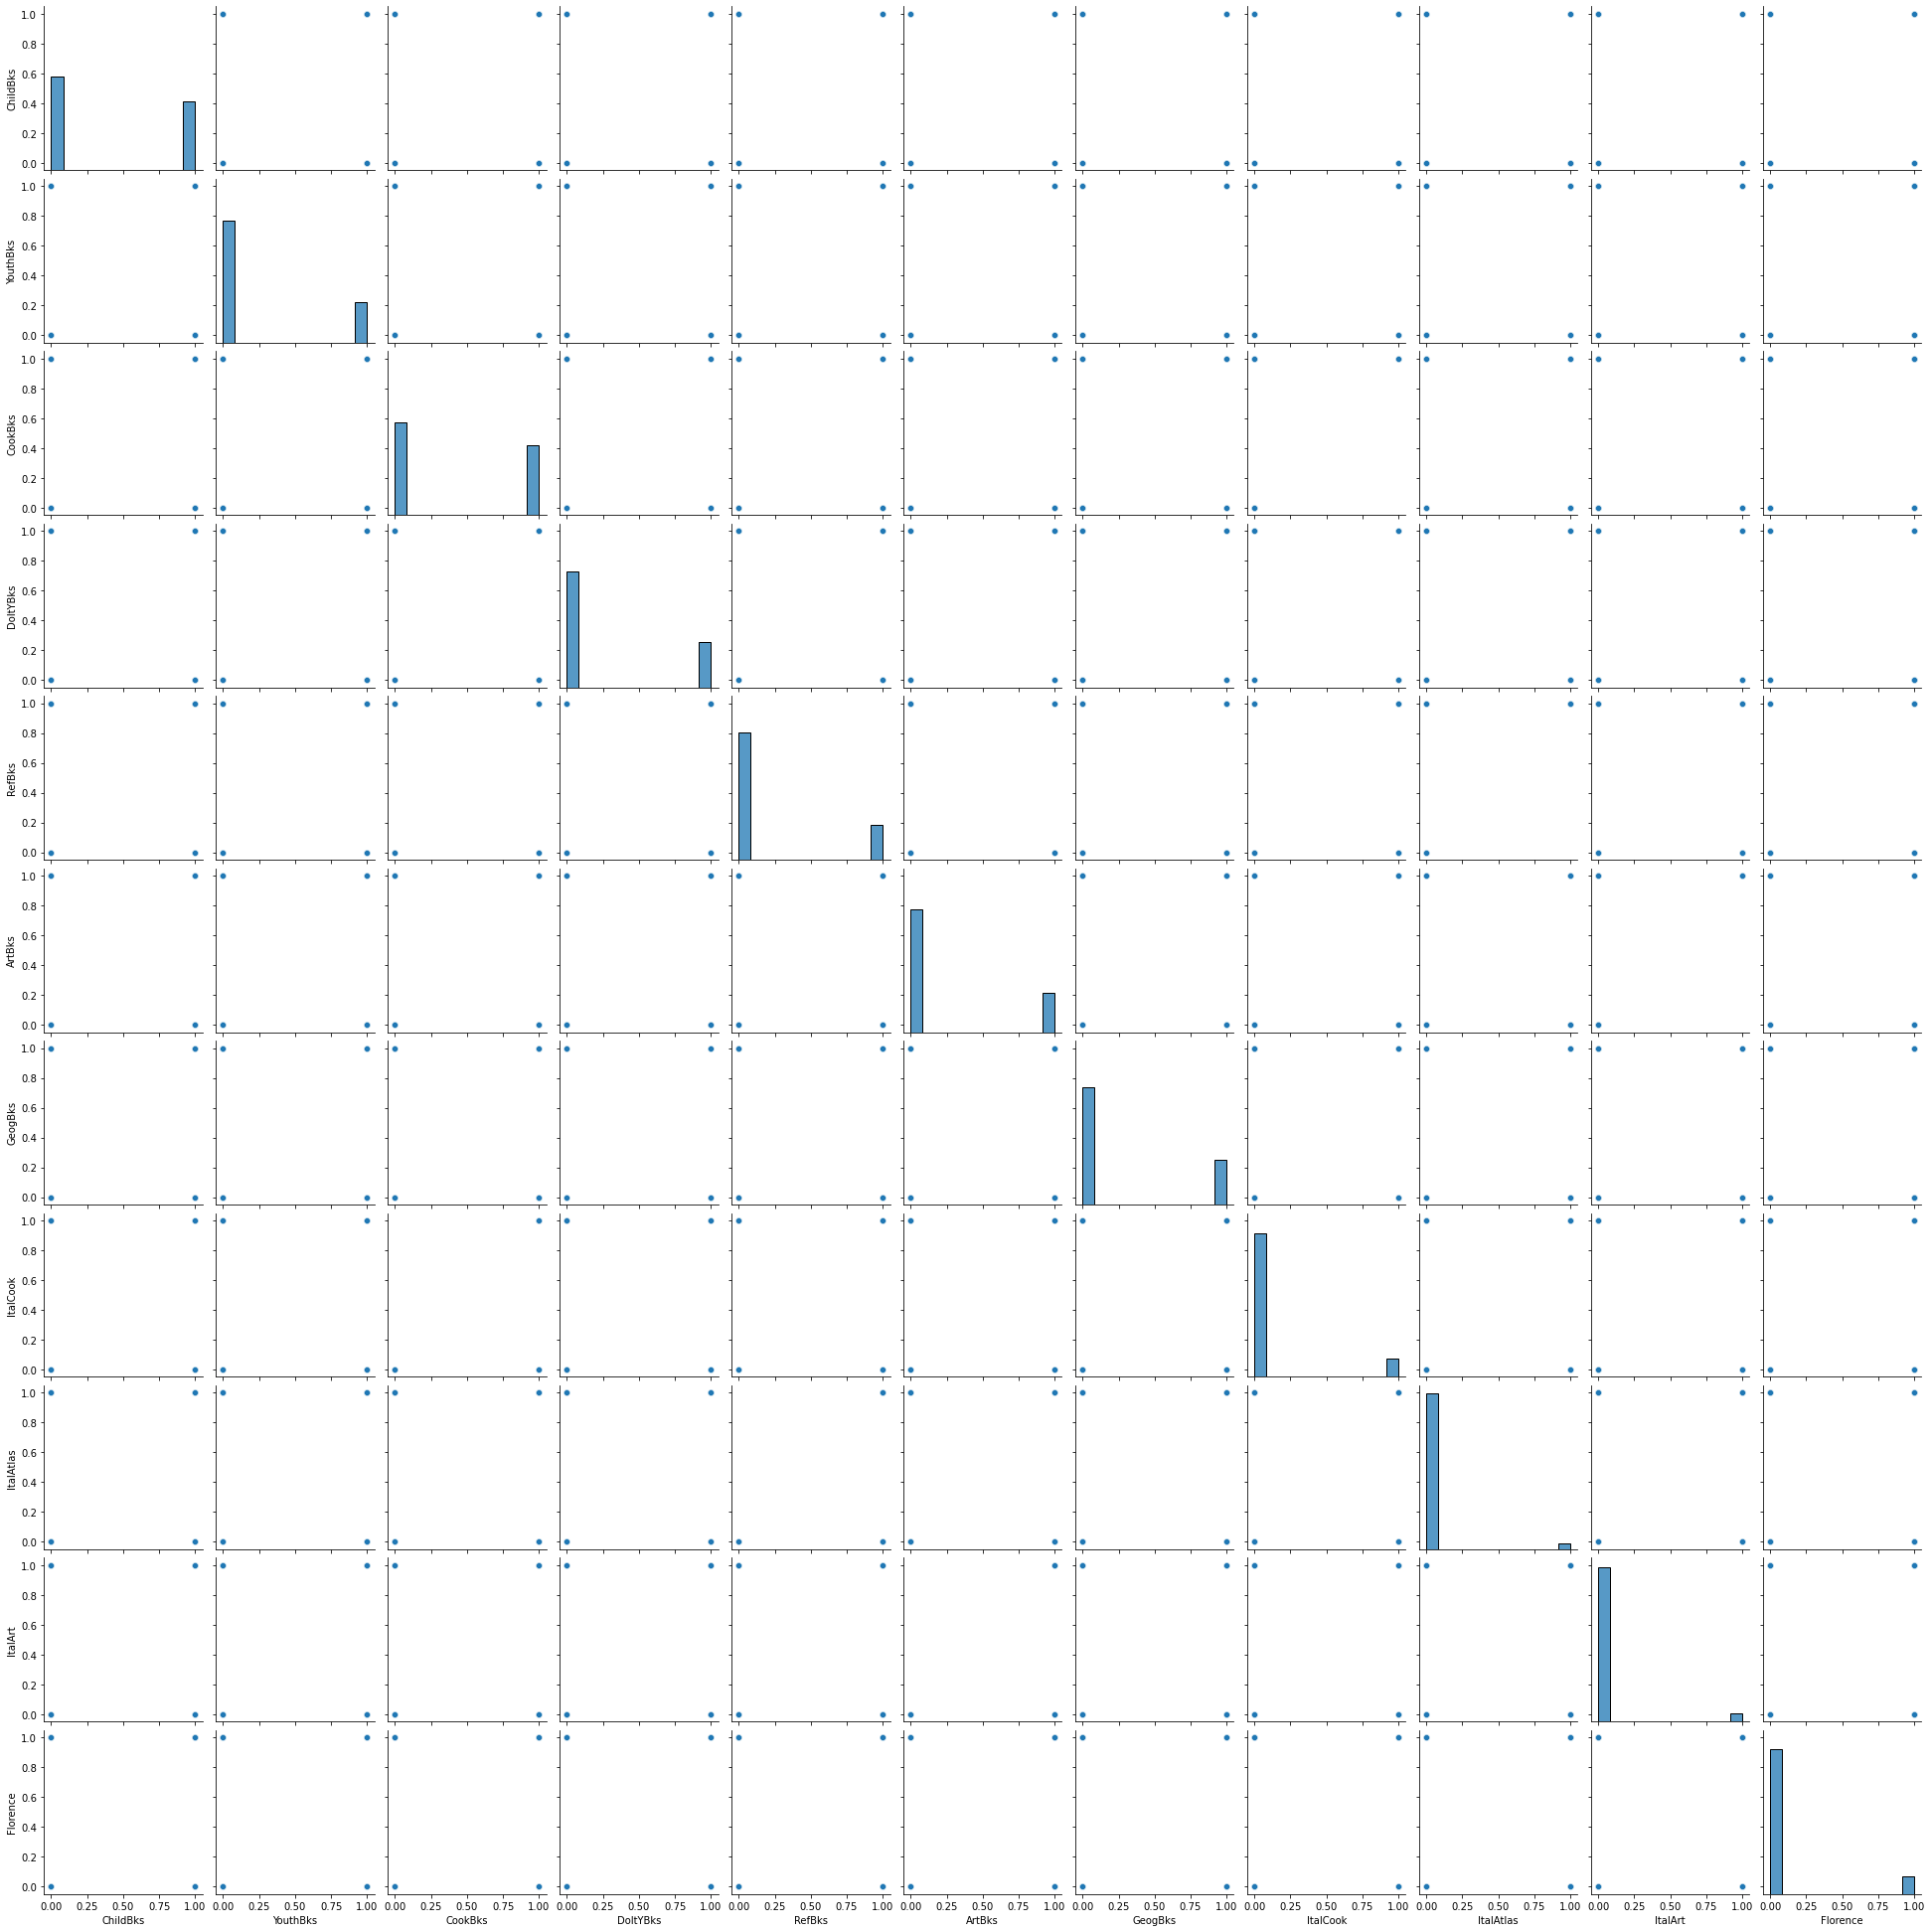

In [9]:
sns.pairplot(Book)

C:\Excel R\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CookBks', ylabel='ChildBks'>

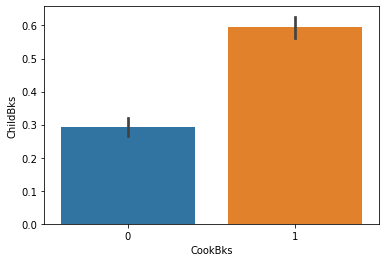

In [10]:
sns.barplot(Book['CookBks'], Book['ChildBks'])

C:\Excel R\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ChildBks', ylabel='CookBks'>

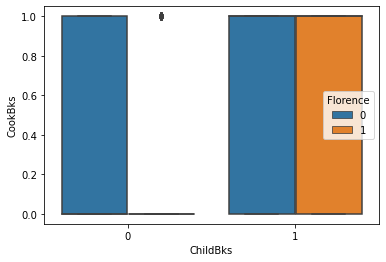

In [11]:
sns.boxplot(Book['ChildBks'], Book['CookBks'], hue=Book['Florence'])

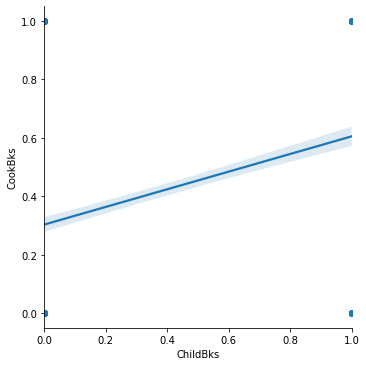

In [12]:
sns.lmplot(x='ChildBks', y='CookBks', data=Book)

C:\Excel R\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


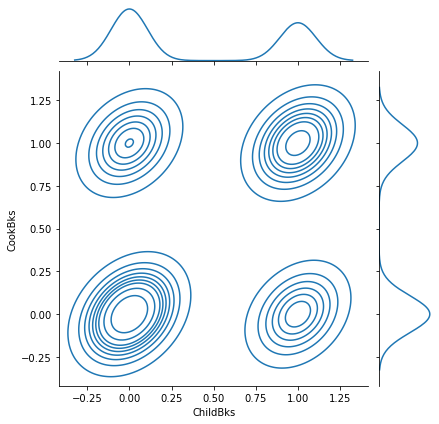

In [13]:
sns.jointplot(Book['ChildBks'],Book['CookBks'], kind="kde")

In [14]:
df=pd.get_dummies(Book)
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [15]:
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
Book.shape

(2000, 11)

# Apriori Algorithm

In [17]:
frequent_itemsets = apriori(Book, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [18]:
Rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
Rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [19]:
Rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
84,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
99,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
94,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [20]:
Rules[Rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [21]:
Rules1=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
Rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
4,"(CookBks, YouthBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
5,"(YouthBks, ChildBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917
6,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928
7,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
8,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
9,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534


In [22]:
Rules1.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
16,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
17,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
8,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
15,"(ArtBks, GeogBks)",(ChildBks),0.1275,0.423,0.1020,0.800000,1.891253,0.048067,2.885000
18,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
4,"(CookBks, YouthBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
9,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
14,"(GeogBks, DoItYBks)",(ChildBks),0.1325,0.423,0.1045,0.788679,1.864490,0.048452,2.730446
7,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158


In [23]:
Rules1[Rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
4,"(CookBks, YouthBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
5,"(YouthBks, ChildBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917
6,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928
7,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
8,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
9,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534


# Movies Dataset

In [24]:
Movies = pd.read_csv("C:/Users/lenovo/Downloads/my_movies.csv")
Movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [25]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [26]:
# Visualization

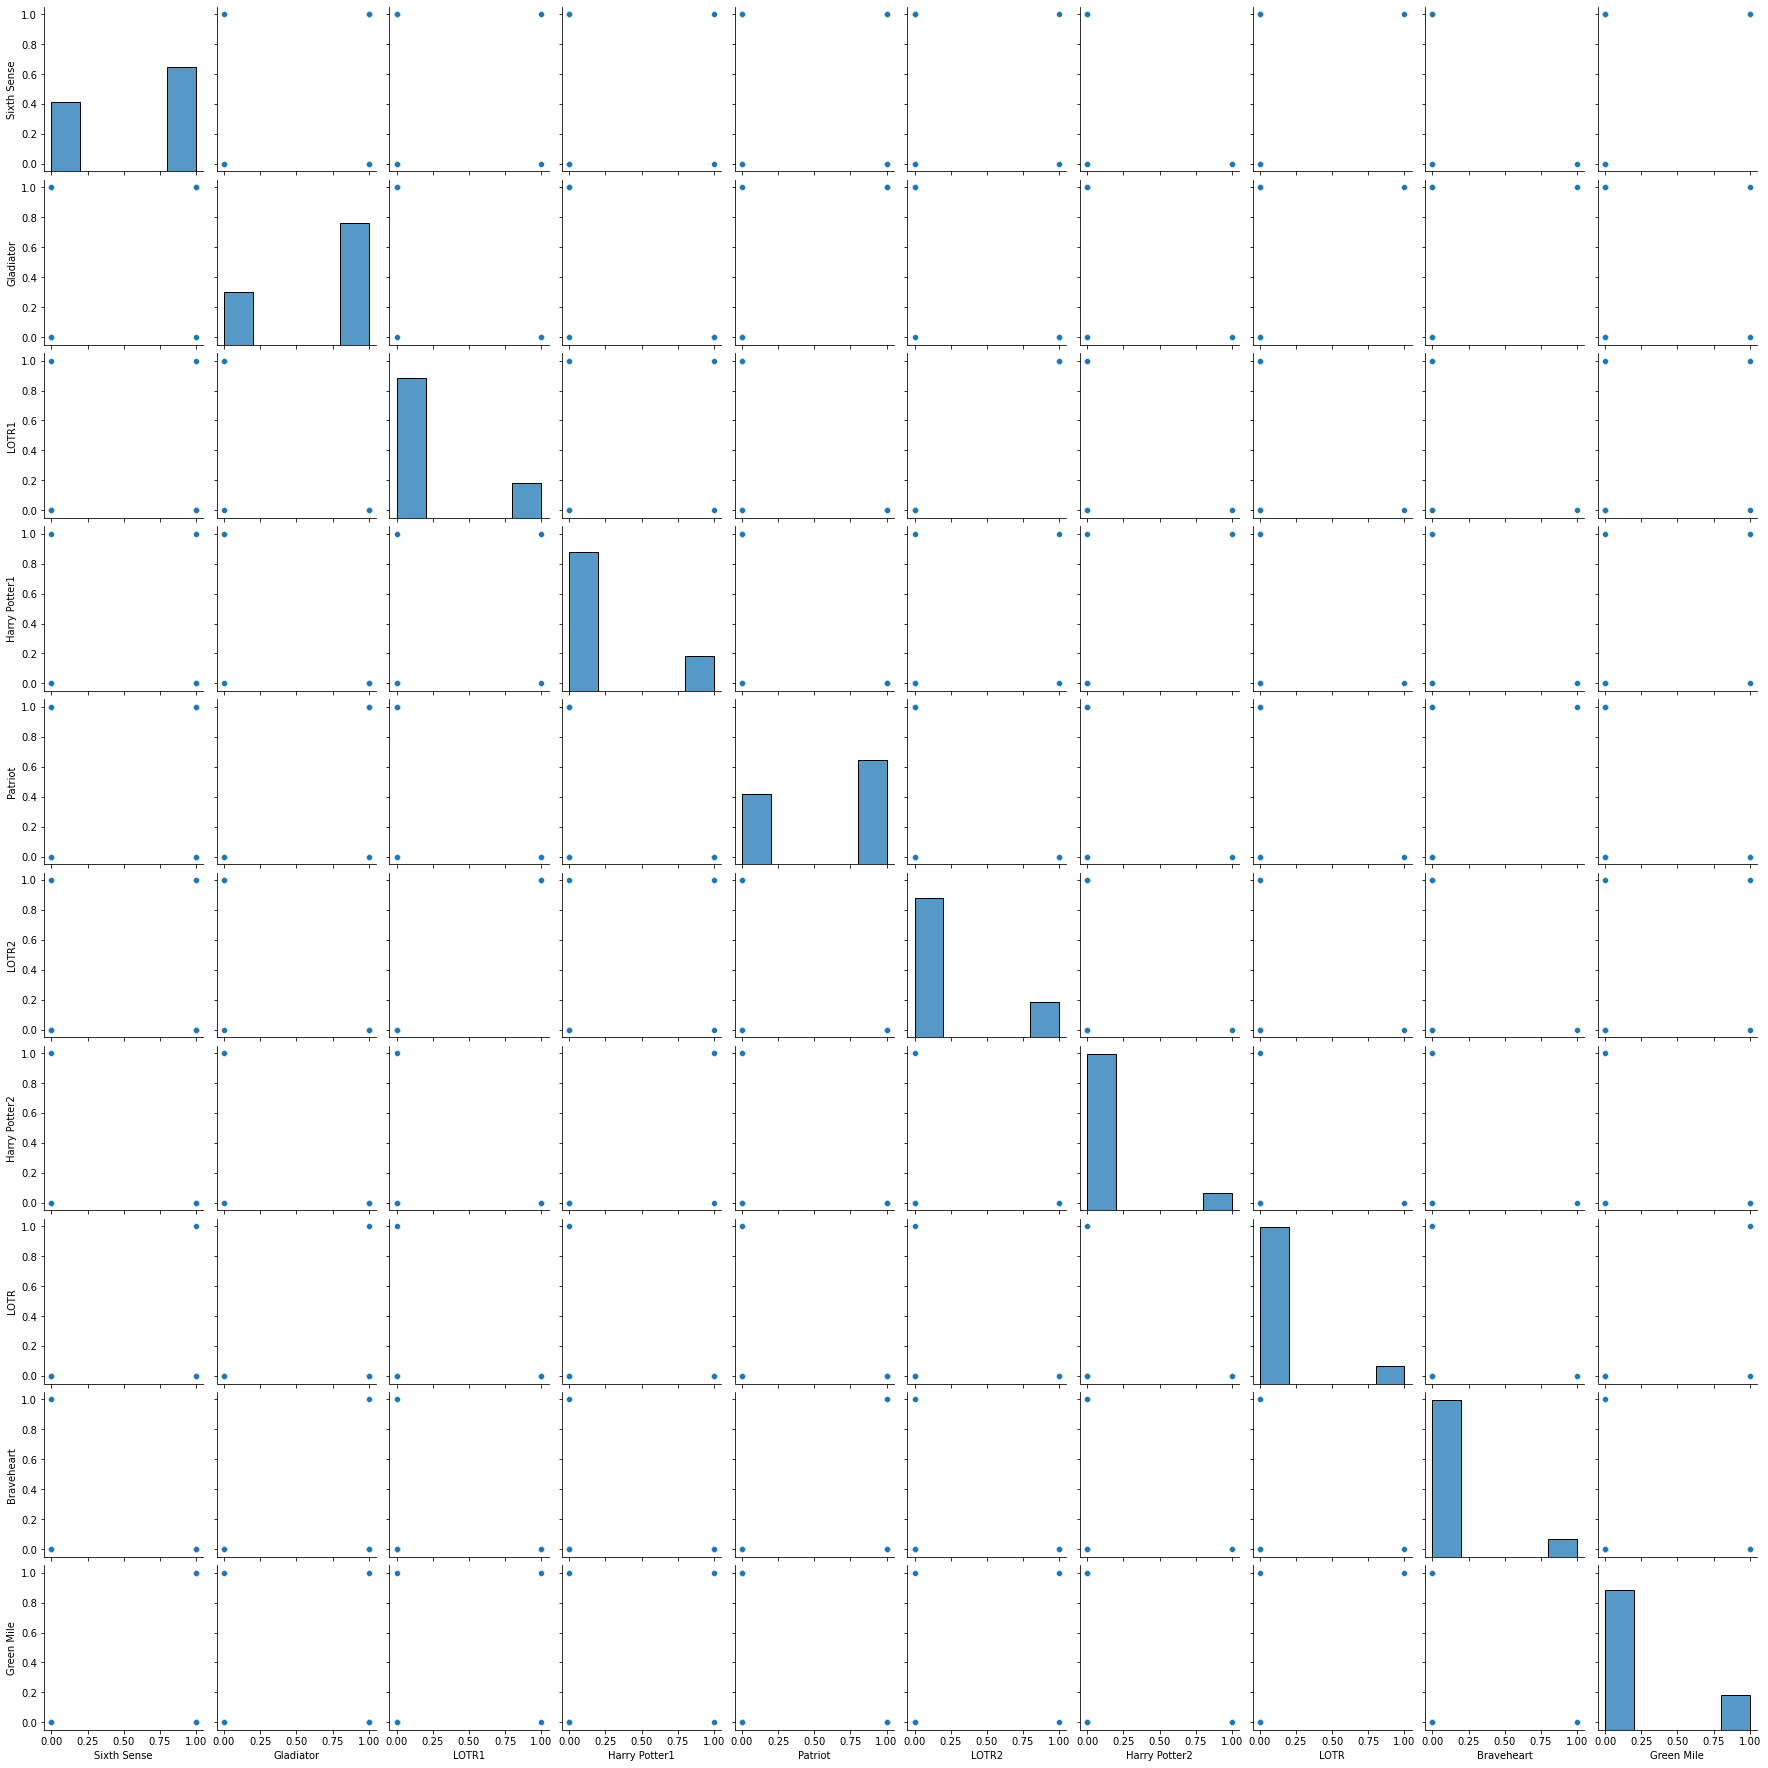

In [27]:
sns.pairplot(Movies)

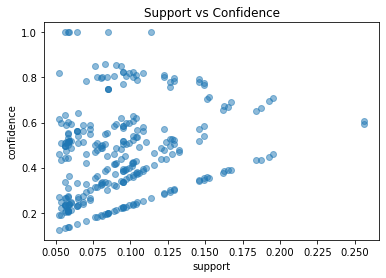

In [28]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

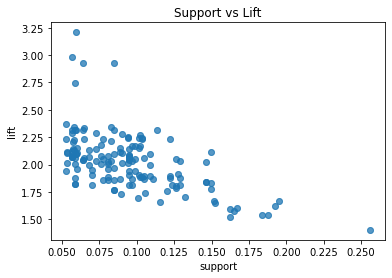

In [29]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

# Pre-Processing 

In [30]:
My_Movies=pd.get_dummies(Movies)
My_Movies.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [31]:
My_Movies.shape

(10, 25)

# Apriori Algorithm

In [32]:
frequent_itemsets1 = apriori(My_Movies, min_support=0.1, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Green Mile, V1_Sixth Sense, Harry Potter1, Si..."
1393,0.1,"(Green Mile, LOTR2, V1_Sixth Sense, Sixth Sens..."
1394,0.1,"(Green Mile, LOTR2, V1_Sixth Sense, Harry Pott..."
1395,0.1,"(Green Mile, LOTR2, V1_Sixth Sense, Harry Pott..."


In [33]:
Rules2 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.7)
Rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
64247,(LOTR1),"(Green Mile, LOTR2, V1_Sixth Sense, Harry Pott...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(V5_LOTR2),"(Green Mile, LOTR2, V1_Sixth Sense, Harry Pott...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(V2_LOTR1),"(Green Mile, LOTR2, V1_Sixth Sense, Harry Pott...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64250,(V4_Green Mile),"(Green Mile, LOTR2, V1_Sixth Sense, Harry Pott...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [34]:
Rules2.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(Green Mile, LOTR1, V5_LOTR2, Sixth Sense)","(LOTR2, V3_Harry Potter1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42207,"(Green Mile, LOTR1, V2_LOTR1, Harry Potter1)","(LOTR2, V1_Sixth Sense, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42195,"(Green Mile, LOTR2, V5_LOTR2, Harry Potter1)","(LOTR1, V1_Sixth Sense, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42196,"(Green Mile, LOTR2, V2_LOTR1, Harry Potter1)","(LOTR1, V1_Sixth Sense, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42197,"(Green Mile, LOTR2, LOTR1, V5_LOTR2)","(V1_Sixth Sense, V2_LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42198,"(Green Mile, LOTR2, LOTR1, V2_LOTR1)","(V5_LOTR2, V1_Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42199,"(Green Mile, LOTR2, V5_LOTR2, V2_LOTR1)","(LOTR1, V1_Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42200,"(Green Mile, LOTR1, V1_Sixth Sense, Harry Pott...","(LOTR2, V5_LOTR2, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42201,"(Green Mile, V5_LOTR2, V1_Sixth Sense, Harry P...","(LOTR2, LOTR1, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42202,"(Green Mile, V1_Sixth Sense, V2_LOTR1, Harry P...","(LOTR2, LOTR1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [35]:
Rules2[Rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64247,(LOTR1),"(Green Mile, LOTR2, V1_Sixth Sense, Harry Pott...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(V5_LOTR2),"(Green Mile, LOTR2, V1_Sixth Sense, Harry Pott...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64249,(V2_LOTR1),"(Green Mile, LOTR2, V1_Sixth Sense, Harry Pott...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64250,(V4_Green Mile),"(Green Mile, LOTR2, V1_Sixth Sense, Harry Pott...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [36]:
Rules3 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.7)
Rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
56755,"(V2_LOTR1, V3_Harry Potter1)","(Green Mile, LOTR2, V1_Sixth Sense, Harry Pott...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56756,"(V4_Green Mile, V3_Harry Potter1)","(Green Mile, LOTR2, V1_Sixth Sense, Harry Pott...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56757,(V5_LOTR2),"(Green Mile, LOTR2, V1_Sixth Sense, Harry Pott...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56758,(V2_LOTR1),"(Green Mile, LOTR2, V1_Sixth Sense, Harry Pott...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [37]:
Rules3.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28380,"(LOTR1, V3_Harry Potter1)","(Green Mile, V1_Sixth Sense, Harry Potter1, Si...",0.1,0.1,0.1,1.0,10.0,0.09,inf
37538,"(Green Mile, V2_LOTR1)","(V1_Sixth Sense, Harry Potter1, LOTR1, V5_LOTR...",0.1,0.1,0.1,1.0,10.0,0.09,inf
37540,"(LOTR1, V1_Sixth Sense)","(Green Mile, Harry Potter1, V5_LOTR2, V2_LOTR1...",0.1,0.1,0.1,1.0,10.0,0.09,inf
37541,"(V5_LOTR2, V1_Sixth Sense)","(Green Mile, Harry Potter1, LOTR1, V2_LOTR1, V...",0.1,0.1,0.1,1.0,10.0,0.09,inf
37542,"(V1_Sixth Sense, V2_LOTR1)","(Green Mile, Harry Potter1, LOTR1, V5_LOTR2, V...",0.1,0.1,0.1,1.0,10.0,0.09,inf
37543,"(LOTR1, Harry Potter1)","(Green Mile, V1_Sixth Sense, V5_LOTR2, V2_LOTR...",0.1,0.1,0.1,1.0,10.0,0.09,inf
37544,"(V5_LOTR2, Harry Potter1)","(Green Mile, V1_Sixth Sense, LOTR1, V2_LOTR1, ...",0.1,0.1,0.1,1.0,10.0,0.09,inf
37545,"(V2_LOTR1, Harry Potter1)","(Green Mile, V1_Sixth Sense, LOTR1, V5_LOTR2, ...",0.1,0.1,0.1,1.0,10.0,0.09,inf
37546,"(V4_Green Mile, Harry Potter1)","(Green Mile, V1_Sixth Sense, LOTR1, V5_LOTR2, ...",0.1,0.1,0.1,1.0,10.0,0.09,inf
37547,"(LOTR1, V5_LOTR2)","(Green Mile, V1_Sixth Sense, Harry Potter1, V2...",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [38]:
Rules3[Rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
56755,"(V2_LOTR1, V3_Harry Potter1)","(Green Mile, LOTR2, V1_Sixth Sense, Harry Pott...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56756,"(V4_Green Mile, V3_Harry Potter1)","(Green Mile, LOTR2, V1_Sixth Sense, Harry Pott...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56757,(V5_LOTR2),"(Green Mile, LOTR2, V1_Sixth Sense, Harry Pott...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56758,(V2_LOTR1),"(Green Mile, LOTR2, V1_Sixth Sense, Harry Pott...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
